Exploring the orthogonal viewer
===============================

The Orthogonal Viewer is a convenient tool for making quick vilualizations of 3D voxel images.
In this tutorial, we'll explore how to use the ``Orthogonal Viewer`` class. For detailed documentation,
see the corresponding [OrthogonalViewer API document](../../api/viz/orthogonal_viewer.rst)

Initial view
------------

First let's open the Bentheimer sandstone data [imported before](./sample_data/import_bentheimer_sandstone.ipynb)
and create a simple instance of the OrthogonalViewer.

[2025-01-08 16:59:41] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 39.90chunk/s]
[2025-01-08 16:59:41] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:03<00:00,  2.35chunk/s]


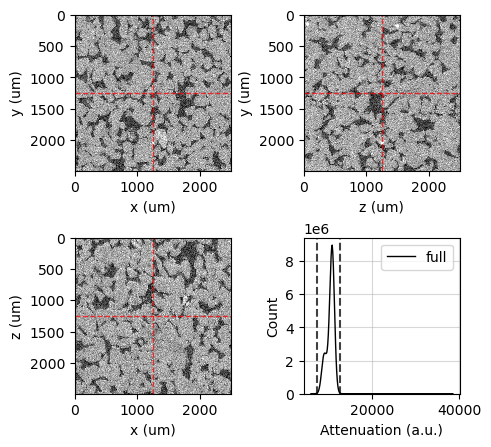

In [1]:
import rockverse as rv
bentheimer_ct = rv.open('/path/to/imported/Bentheimer/original')
viewer = rv.OrthogonalViewer(image=bentheimer_ct)

The viewer defaults to grayscale slices crossing the center of the image with color limits spanning 99.9% confidence interval from the image histogram. Horizontal and vertical lines in each slice show the intersection lines with the corresponding crossing slices. 

Note how labels and axis are automatically built using VoxelImage attributes such as field name, voxel length, voxel origin, and voxel unit.

You can access Matplotlib figure and axes through the corresponding 
[OrthogonalViewer attributes](../../api/viz/orthogonal_viewer.rst)

- ``figure``
- ``ax_xy``
- ``ax_zy``
- ``ax_xz``
- ``ax_histogram``

For example, lets set the histogram xlim:

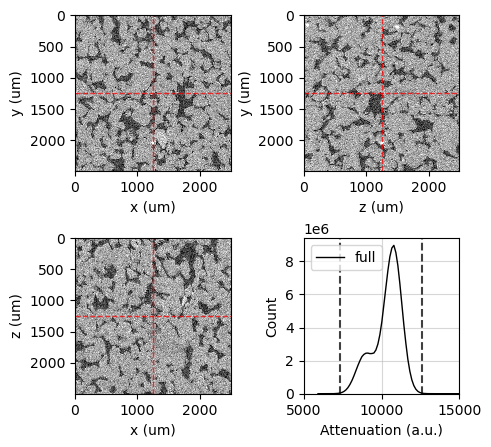

In [2]:
viewer.ax_histogram.set_xlim(5000, 15000)
viewer.figure

The reference point can be any point in the image, and can be set by a mouse right click in any image slice when in interactive mode. It can also be set through the ``ref_point`` attribute using values in voxel length units:

Current reference point: (1250.0, 1250.0, 1250.0)
New reference point: (500.0, 1000.0, 1500.0)


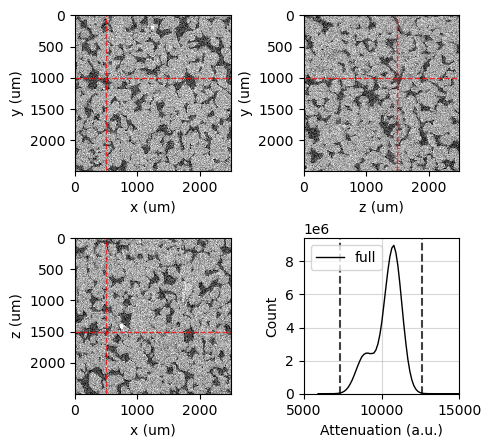

In [3]:
print(f'Current reference point: {viewer.ref_point}')
viewer.ref_point = (500, 1000, 1500)
print(f'New reference point: {viewer.ref_point}')
viewer.figure

You can also set the reference by voxel index:

Current reference voxel: (100, 200, 300)
New reference voxel: (125, 250, 375)


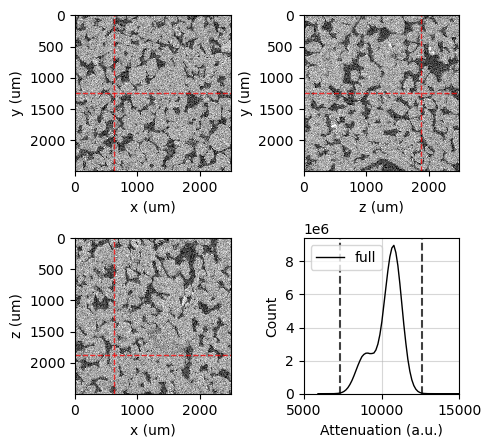

In [4]:
print(f'Current reference voxel: {viewer.ref_voxel}')
viewer.ref_voxel = (125, 250, 375)
print(f'New reference voxel: {viewer.ref_voxel}')
viewer.figure

The ``image_dict`` attribute contains the customization options for the image display. You can customize these options using the ``update_image_dict`` method:

Current options: {'cmap': 'gray', 'interpolation': 'none', 'clim': array([ 7337.17191789, 12618.50447666])}
New options: {'cmap': 'Oranges_r', 'interpolation': 'none', 'clim': (7000, 13000)}


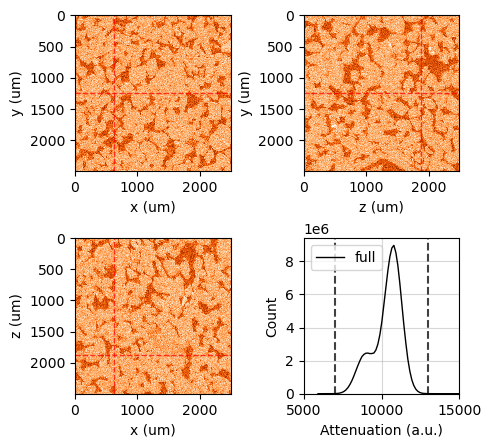

In [5]:
print(f'Current options: {viewer.image_dict}')
viewer.update_image_dict(cmap='Oranges_r', clim=(7000, 13000))
print(f'New options: {viewer.image_dict}')
viewer.figure

The ``clim`` value can also be set by mouse left and right click on histogram axis (for minimum and maximum value, respectively) in interactive mode. Let's go back to gray scale to continue our tutorial:

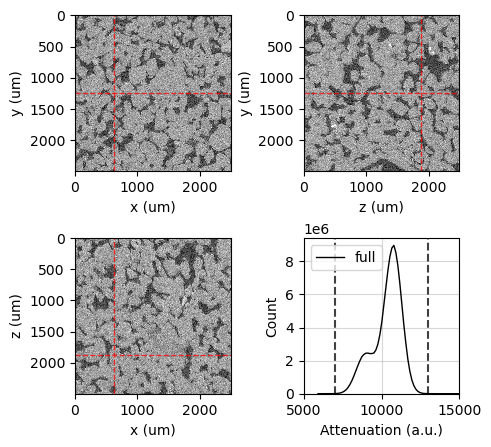

In [6]:
viewer.update_image_dict(cmap='gray', clim=(7000, 13000))
viewer.figure

Guide lines can also be hidden or customized by setting attributes and using update methods:

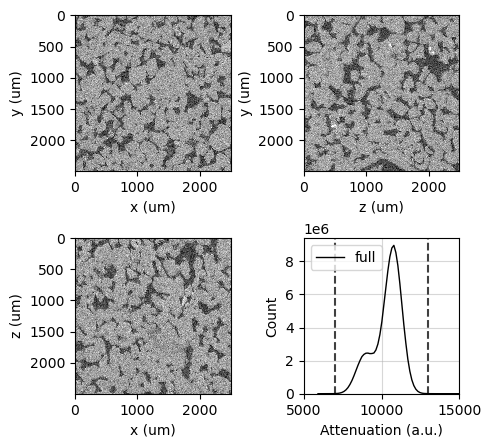

In [7]:
viewer.show_guide_lines = False
viewer.figure

Current guide_line_dict: {'linestyle': '--', 'color': 'r', 'alpha': 0.75, 'linewidth': 1}
Current guide_line_dict: {'linestyle': '-', 'color': 'gold', 'alpha': 1, 'linewidth': 1}


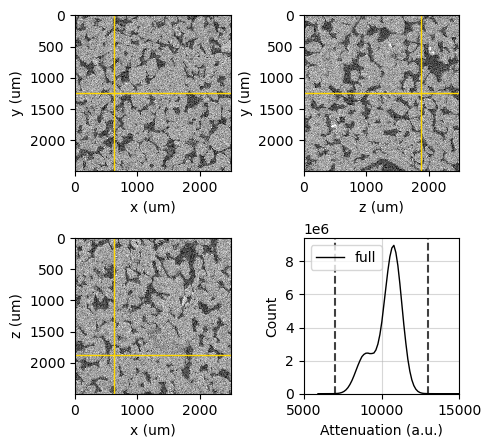

In [8]:
viewer.show_guide_lines = True
print(f'Current guide_line_dict: {viewer.guide_line_dict}')
viewer.update_guide_line_dict(linestyle='-', color='gold', alpha=1)
print(f'Current guide_line_dict: {viewer.guide_line_dict}')
viewer.figure

Masks and Regions
-----------------

Masks and regions of interests can be applied to the image through
``mask`` and ``region`` attributes. Masked voxels and voxels outside
the region of interest will be ignored when calculating the histogram.
Let's illustrate a region definition:

[2025-01-08 16:59:50] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00,  9.80chunk/s]
[2025-01-08 16:59:51] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:01<00:00,  7.16chunk/s]


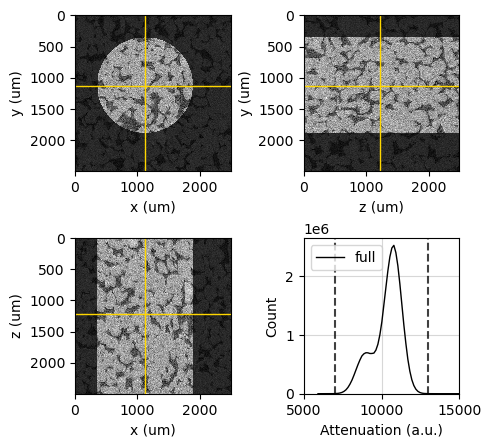

In [9]:
viewer.region = rv.region.Cylinder(p=(1125, 1125, 1225), r=750, v=(0, 0, 1))
viewer.ref_point = viewer.region.p
viewer.update_image_dict(clim=(7000, 13000))
viewer.ax_histogram.set_xlim(5000, 15000)
viewer.figure

Masks and regions of interest will be combined in one final mask. The mask overlay in the image can be customized 
as well:

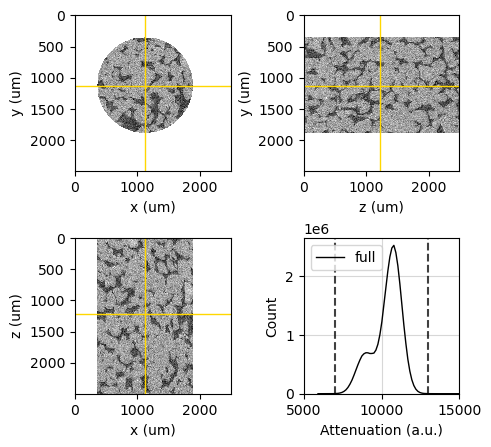

In [10]:
viewer.mask_color = 'white'
viewer.mask_alpha = 1
viewer.figure


Set region or mask to ``None`` if you want to remove them. The histogram will be recalculated.

[2025-01-08 16:59:54] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 36.94chunk/s]
[2025-01-08 16:59:55] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:02<00:00,  2.95chunk/s]


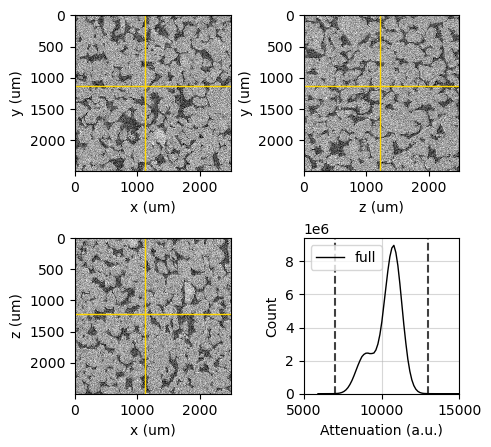

In [11]:
viewer.region = None
viewer.update_image_dict(clim=(7000, 13000))
viewer.ax_histogram.set_xlim(5000, 15000)
viewer.figure

Overlaying segmentation
-----------------------

Set the segmentation with the ``segmentation`` attribute. This will trigger the histogram recalculation and show each indivudual phase in the histogram plot, with colors matching the segmentation overlay colors.

[2025-01-08 16:59:58] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 41.54chunk/s]
[2025-01-08 16:59:58] Histogram Attenuation (reading segmentation): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 54.07chunk/s]
[2025-01-08 16:59:59] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:03<00:00,  2.57chunk/s]


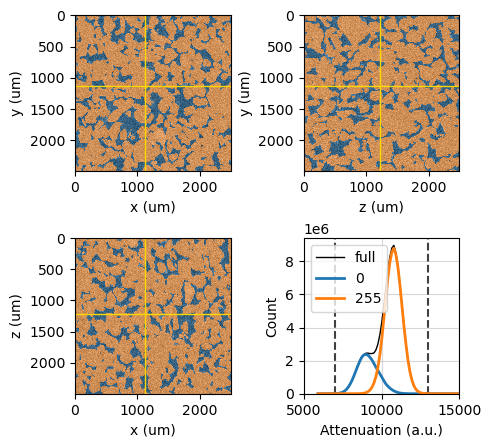

In [12]:
bentheimer_segmentation = rv.open('/path/to/imported/Bentheimer/segmented')
viewer.segmentation = bentheimer_segmentation
viewer.figure

Segmentation colors are assigned to each phase by cicling through a list of pre-defined colors. You can see the assigned colors by inspecting the ``segmentation_colormap`` attribute:

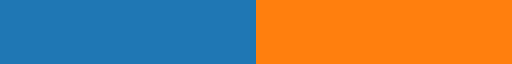

In [13]:
viewer.segmentation_colormap

and get a list of the predefined colors through the ``segmentation_colors`` attribute:

In [14]:
viewer.segmentation_colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

Note that the list length does not need to match the number of segmentation phases, as the color list will be cycled through. In this example, only the first two colors were used. You can pass your own list of colors in any format accepted by Matplotlib:

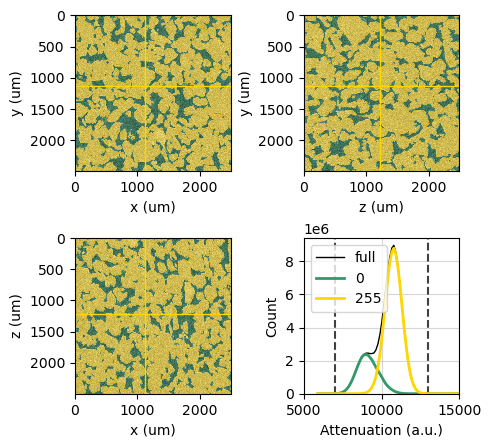

In [15]:
viewer.segmentation_colors = ('#339966', 'gold', (0, 0.5, 0.9))
viewer.figure

or directly use one of Matplotlib qualitative colormaps:

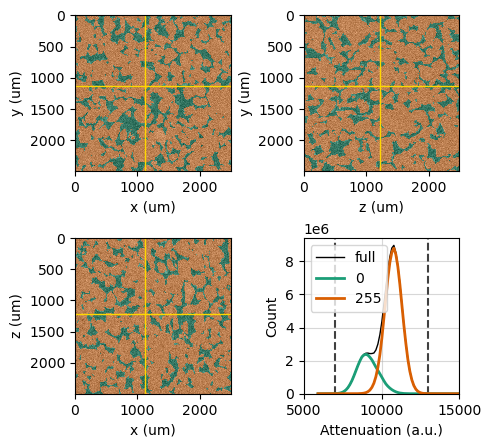

In [16]:
viewer.segmentation_colors = 'Dark2'
viewer.figure

You can set the segmentation overlay transparency level using the ``segmentation_alpha`` attribute:

Old alpha = 0.5
New alpha = 0.15


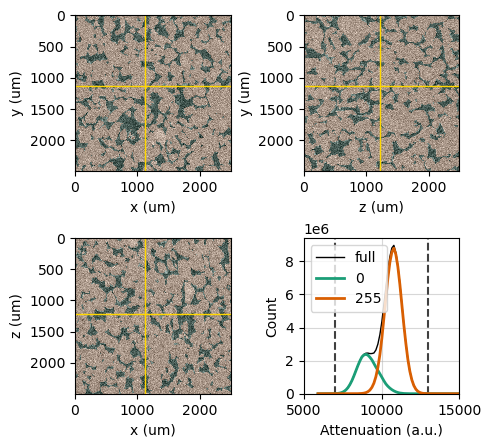

In [17]:
print(f"Old alpha = {viewer.segmentation_alpha}")
viewer.segmentation_alpha = 0.15
print(f"New alpha = {viewer.segmentation_alpha}")
viewer.figure


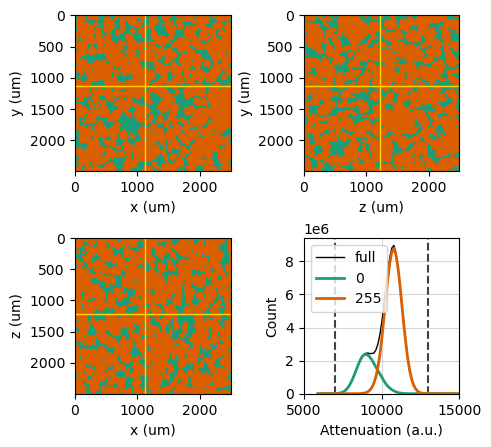

In [18]:
viewer.segmentation_alpha = 1
viewer.figure

Customizing histogram lines
---------------------------

The ``OrthogonalView`` class uses a dictionary of Matplotlib ``Line2D`` properties 
to customize the histogram lines:

In [19]:
print(f'''
full: {viewer.histogram_line_dict['full']},
phases: {viewer.histogram_line_dict['phases']},
clim: {viewer.histogram_line_dict['clim']},
''')


full: {'color': 'k', 'linewidth': 1, 'linestyle': '-'},
phases: {'linewidth': 2, 'linestyle': '-'},
clim: {'color': 'k', 'linestyle': '--', 'alpha': 0.75},



You can change these properties using the ``update_histogram_line_dict`` method:

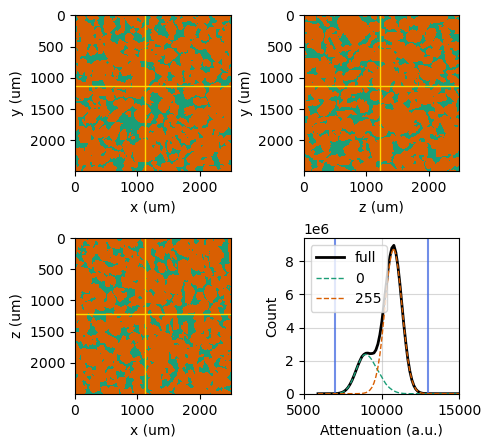

In [20]:
viewer.update_histogram_line_dict({
    'full': {'linewidth': 2},
    'phases': {'linewidth': 1, 'linestyle': '--'},
    'clim': {'color': 'royalblue', 'linestyle': '-'},
})
viewer.figure

For further customization, all the Matplotlib ``Line2D`` objects are available as a 
dictionary in the ``histogram_lines`` attribute and can be individually accessed:

In [21]:
viewer.histogram_lines

{'cmin': <matplotlib.lines.Line2D at 0x235c5937740>,
 'cmax': <matplotlib.lines.Line2D at 0x235c5915130>,
 'full': <matplotlib.lines.Line2D at 0x235c5915b50>,
 '0': <matplotlib.lines.Line2D at 0x235c5b170b0>,
 '255': <matplotlib.lines.Line2D at 0x235c5a808c0>}

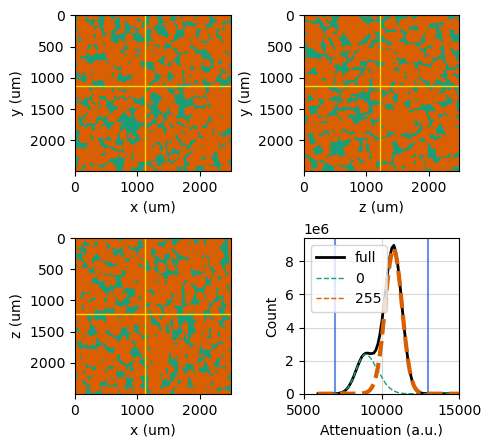

In [22]:
viewer.histogram_lines['255'].set(linewidth=3)
viewer.figure

Careful!... It can get ugly pretty quick. Let's rebuild our plot with some reasonable parameters. Remember you can pass all the customization at the class instantiation command, saving time on histogram recalculations.

[2025-01-08 17:06:20] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00,  8.94chunk/s]
[2025-01-08 17:06:21] Histogram Attenuation (reading segmentation): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 48.01chunk/s]
[2025-01-08 17:06:21] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:01<00:00,  4.25chunk/s]


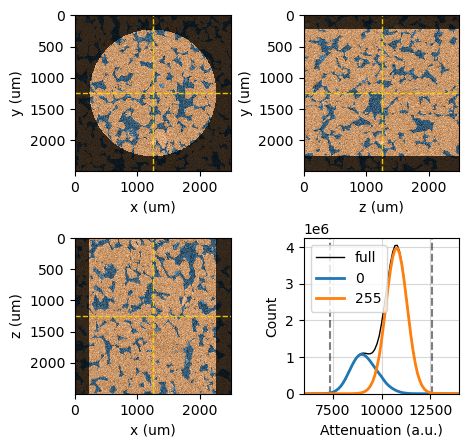

In [38]:
viewer = rv.OrthogonalViewer(image=bentheimer_ct,
                             segmentation=bentheimer_segmentation,
                             ref_point=(1250, 1250, 1250),
                             region=rv.region.Cylinder(p=(1250, 1250, 1250), r=1000, v=(0, 0, 1)),
                             segmentation_alpha=0.4,
                             guide_line_dict={'color': 'gold', 'alpha': 0.9},
                             histogram_line_dict={'clim': {'color': 'k', 'alpha': 0.5}}
                             )
_ = viewer.ax_histogram.set_xlim(6000, 14000)

Planes and layout
-----------------

We can choose which planes to show and the grid configuration through the following attributes:

- ``show_xy_plane``: boolean
- ``show_xz_plane``: boolean
- ``show_zy_plane``: boolean
- ``show_histogram``: boolean
- ``layout``: {'2x2', 'horizontal', 'vertical'}

Some examples below:

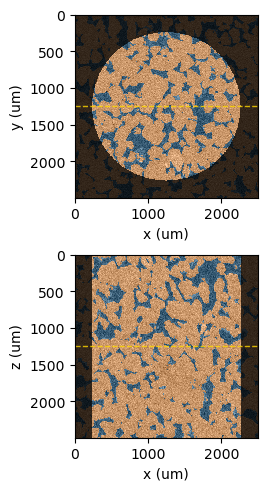

In [29]:
viewer.layout='2x2'
viewer.show_xy_plane = True
viewer.show_xz_plane = True
viewer.show_zy_plane = False
viewer.show_histogram = False
viewer.figure

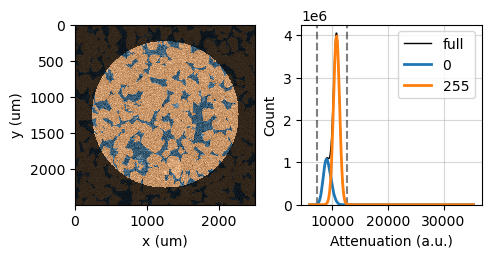

In [31]:
viewer.layout='horizontal'
viewer.show_xy_plane = True
viewer.show_xz_plane = False
viewer.show_zy_plane = False
viewer.show_histogram = True
viewer.figure

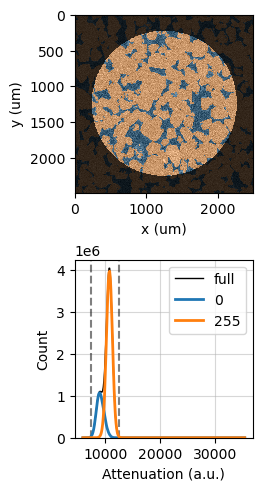

In [33]:
viewer.layout='vertical'
viewer.show_xy_plane = True
viewer.show_xz_plane = False
viewer.show_zy_plane = False
viewer.show_histogram = True
viewer.figure

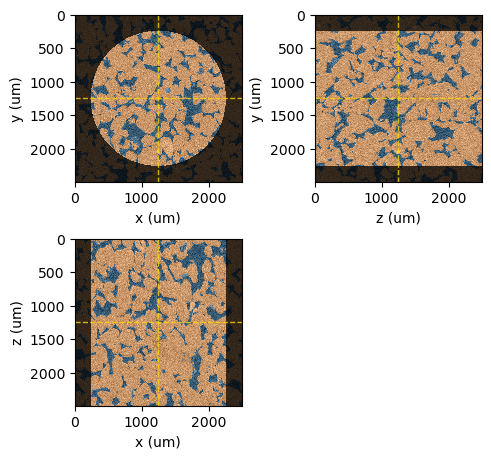

In [34]:
viewer.layout='2x2'
viewer.show_xy_plane = True
viewer.show_xz_plane = True
viewer.show_zy_plane = True
viewer.show_histogram = False
viewer.figure

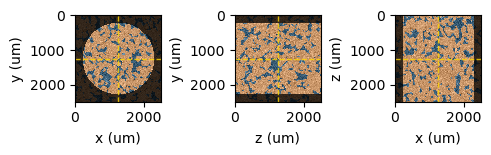

In [36]:
viewer.layout='horizontal'
viewer.show_xy_plane = True
viewer.show_xz_plane = True
viewer.show_zy_plane = True
viewer.show_histogram = False
viewer.figure

Notice how the guide lines are shown/hidden accordingly to the visible planes.